In [40]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import time
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# 不发出警告

print('导入成功')

导入成功


### 1、数据采集

In [11]:
# 网页数据采集测试

u = 'https://movie.douban.com/subject/26100958/comments?start=0&limit=20&sort=new_score&status=P'
r = requests.get(url=u)
r.encoding = 'utf-8' 

# 访问网页
soup = BeautifulSoup(r.text)
# 解析网页
infor_lst = soup.find('div',id = 'comments').find_all('div',class_ = 'comment-item')
# 获取所有评论标签div

dic = {}
for infor in infor_lst:
    dic['评论者'] = infor.find('span',class_="comment-info").find('a').text
    dic['评分'] = int(infor.find('span',class_="comment-info").find_all('span')[1]['class'][0][-2:])
    dic['评论时间'] = infor.find('span',class_="comment-time").text.replace('\n','').replace(' ','') #改用attrs属性
    dic['评论内容'] = infor.find('p').text.replace('\n','')
    dic['有用数量'] = int(infor.find('span',class_="votes").text) 
print(dic)


{'评论者': '大奇特(Grinch)', '评分': 40, '评论时间': '2019-04-24', '评论内容': '其实我一直不喜欢《复联1-3》，尤其对过度拥挤的战斗场面审美疲劳。《复联4》于我来说是一种巨大的解脱，它不再仰仗战斗场面，而是有足够的时间来处理上一集所带来的影响。你在凝视着时间，时间也在凝视着你。这一集是整个漫威宇宙的顶点，也是漫威十一年旅程的暂告一段落，像一场告别，牵动着观众对他们喜欢的角色和故事的记忆跟情感经历。', '有用数量': 607}


In [43]:
# 构建网页信息获取函数
def get_data(ul):
    try:
        #print(ul)
        ri = requests.get(url=ul)

        ri.encoding = 'utf-8'
        # 访问网页

        soupi = BeautifulSoup(ri.text)
        # 解析网页
        
        #infor_lst = soupi.find('div',id="commemts").find_all('div',class_='comment-item')
        infor_lst = soupi.find('div',id = 'comments').find_all('div',class_ = 'comment-item')
        # 获取所有评论标签div
        datalsti = []
        for infor in infor_lst[:]:
            #print(infor)
            dic = {}
            dic['评论者'] = infor.find('span',class_="comment-info").find('a').text
            dic['评分'] = int(infor.find('span',class_="comment-info").find_all('span')[1]['class'][0][-2:])
            dic['评论时间'] = infor.find('span',class_="comment-time").text.replace('\n','').replace(' ','') #改用attrs属性
            dic['评论内容'] = infor.find('p').text.replace('\n','')
            dic['有用数量'] = int(infor.find('span',class_="votes").text)
            #print(dic['评论内容'])
            datalsti.append(dic)
        return datalsti
    except:
        return False
u = 'https://movie.douban.com/subject/26100958/comments?start=140&limit=20&sort=new_score&status=P'
get_data(u)[:2]


[{'有用数量': 70,
  '评分': 20,
  '评论内容': '预想太高   过分失望   3小时的喜剧片',
  '评论时间': '2019-04-24',
  '评论者': '方立天'},
 {'有用数量': 48,
  '评分': 30,
  '评论内容': '你要说给1星吧，肯定招黑，最后乱战怎么也值2星。姑且三星吧。漫威这套电影使得近十年商业电影有了捷径。这时期又是国内娱乐生活的爆发期，也就是看电影的人多了。对所谓的英雄崇拜。对于我们从80-90年代看少年漫画和游戏长大的来说。无论人物还是剧情都没什么特色，无非看看特效。无剧情与所谓的情怀支撑起了系列。我也不是都不喜欢，博士和蚂蚁就很好看，人物命运的改变，比较具有戏剧性。内战也不错，美队有几段挺不错的。不过复联系列，杂糅个人经历的大排档，在我看来很正义联盟也差不多。我觉得有几部独立英雄电影更好看。黑寡妇的间谍，博士的魔法世界大战，蚁人对抗犯罪组织，如果能有续作，我会很开心的。',
  '评论时间': '2019-04-24',
  '评论者': 'detectiveeva'}]

In [84]:
# 构建获取页面网址函数

def get_urls(n):
    urllst = []
    for i in range(n):
        urllst.append('https://movie.douban.com/subject/26100958/comments?start=%i&limit=20&sort=new_score&status=P' % (i*20))
    return urllst
    
urllst = get_urls(6)
urllst

['https://movie.douban.com/subject/26100958/comments?start=0&limit=20&sort=new_score&status=P',
 'https://movie.douban.com/subject/26100958/comments?start=20&limit=20&sort=new_score&status=P',
 'https://movie.douban.com/subject/26100958/comments?start=40&limit=20&sort=new_score&status=P',
 'https://movie.douban.com/subject/26100958/comments?start=60&limit=20&sort=new_score&status=P',
 'https://movie.douban.com/subject/26100958/comments?start=80&limit=20&sort=new_score&status=P',
 'https://movie.douban.com/subject/26100958/comments?start=100&limit=20&sort=new_score&status=P']

In [85]:
# 批量获取评论数据

datalst = []
n = 1

for u in urllst:
    datalst.extend(get_data(u))
    #time.sleep(3)
    print('成功获取%i条数据' % (n*20))
    n += 1

datalst[:3]
print(len(datalst))

成功获取20条数据
成功获取40条数据
成功获取60条数据
成功获取80条数据
成功获取100条数据
成功获取120条数据
120


In [87]:
# 数据格式转换
import pandas as pd
df = pd.DataFrame(datalst)
df.iloc[:10]

,有用数量,评分,评论内容,评论时间,评论者
0,33204,50,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,2019-04-24,棠枫海
1,17958,40,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,2019-04-24,Tel
2,5822,40,对某人而言这就叫有始有终吧，这个时代的星战（90后终于有长达十年的情怀和回忆了）,2019-04-24,深夜的阿斯伯格
3,14081,50,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,2019-04-24,凌睿
4,12488,50,钢铁侠成为了美队，美队活成了钢铁侠。,2019-04-24,Rafe
5,5474,40,用三个小时的时间，与大家告别。是集结，是重聚，是告别，是牺牲。作为系列的最终篇，确实已经努力...,2019-04-24,桃桃淘电影
6,5174,40,搞不懂惊队吹这么久是为什么啥……感觉就是打了个酱油🙄🙄🙄,2019-04-24,sunmmr丶sea
7,1521,40,一个女人，一直以凡人的血肉之躯出生入死，她从未有过真正意义上的家人，从未和哪个喜欢过的人真正...,2019-04-24,人间过客
8,1292,40,漫画里的奇迹一个接一个，电影里的回扣一层接一层，和一切的起点说再见了。这就是，逻辑无能为力，...,2019-04-24,法兰西胶片
9,1109,40,用多线剧情给自己过去的十年做总结，漫威这波操作很官方了，虽然有几处戳泪的剧情节点，也算不破不...,2019-04-24,柯里昂


,有用数量,评分,评论内容,评论时间,评论者,评论字数
0,33204,50,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,2019-04-24,棠枫海,38
1,17958,40,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,2019-04-24,Tel,115
2,5822,40,对某人而言这就叫有始有终吧，这个时代的星战（90后终于有长达十年的情怀和回忆了）,2019-04-24,深夜的阿斯伯格,40
3,14081,50,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,2019-04-24,凌睿,335
4,12488,50,钢铁侠成为了美队，美队活成了钢铁侠。,2019-04-24,Rafe,18


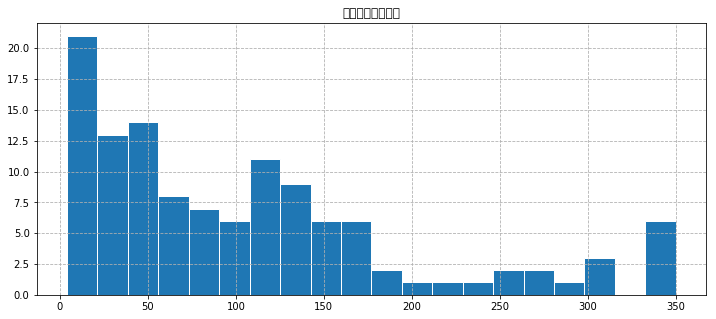

In [88]:
# 评论字数数据分布
df['评论字数'] = df['评论内容'].str.len()
plt.figure(figsize=(12,5))
plt.title(r'评论字数数据分布')
df['评论字数'].hist(bins = 20, edgecolor = 'white')
plt.grid(linestyle='--')
df.head()


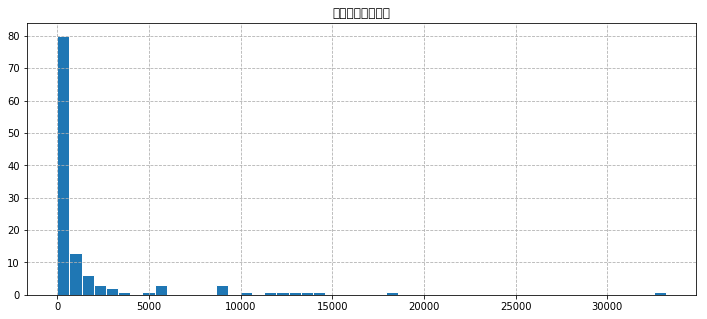

In [89]:
# 有用数量数据分布

plt.figure(figsize=(12,5))
plt.title('有用数量数据分布')
df['有用数量'].hist(bins=50,edgecolor='white')
plt.grid(linestyle='--')

,有用数量,评分,评论内容,评论时间,评论者,评论字数
0,33204,50,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,2019-04-24,棠枫海,38
1,17958,40,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,2019-04-24,Tel,115
3,14081,50,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,2019-04-24,凌睿,335
25,13314,30,不打感情分也就合格水准，通篇流水账观感还不如第三部，虽然我一直认为这类片无所谓剧透，不过为了...,2019-04-24,小轨,128
10,12716,50,献给我人生中最美好的十一年。谢谢你，漫威，谢谢你让我的青春有了一个最完美的结局,2019-04-24,。,39
4,12488,50,钢铁侠成为了美队，美队活成了钢铁侠。,2019-04-24,Rafe,18
13,11344,50,谁能想到是一只老鼠拯救了地球呢？,2019-04-24,KarSa,16
16,10544,50,“I AM IRONMAN! ”既是开始也是结束。谢谢钢铁侠，谢谢漫威给我们带来的欢笑、泪水...,2019-04-24,昊昊的说。,64
21,9166,50,I AM IRONMAN.,2019-04-24,雁落孤山,13
17,9047,50,五星全给黑寡妇，她是最伟大的复仇者！！！,2019-04-24,X教授的傻儿子,20


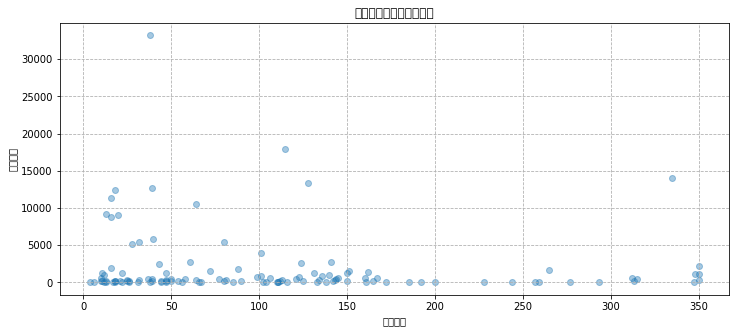

In [90]:
# 评论字数与有用数量关系
plt.figure(figsize=(12,5))
plt.title('评论数字与有用数量关系')
plt.scatter(df['评论字数'],df['有用数量'],alpha=0.4)
plt.xlabel('评论字数')
plt.ylabel('有用数量')
plt.grid(linestyle='--')
df[df['有用数量']>5000].sort_values(by="有用数量",ascending=False)

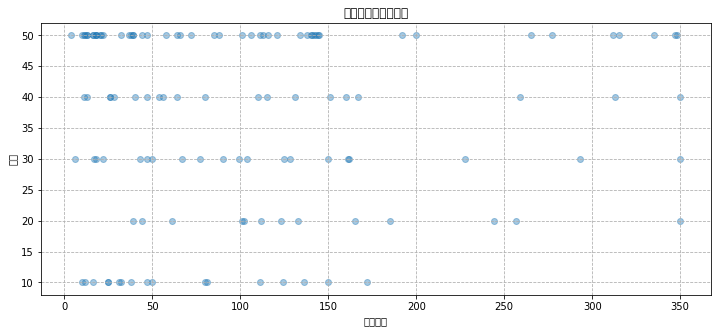

In [91]:
# 评论字数与评分的关系
plt.figure(figsize=(12,5))
plt.title('评论字数与评分关系')
plt.scatter(df['评论字数'],df['评分'],alpha=0.4)
plt.xlabel('评论字数')
plt.ylabel('评分')
plt.grid(linestyle='--')

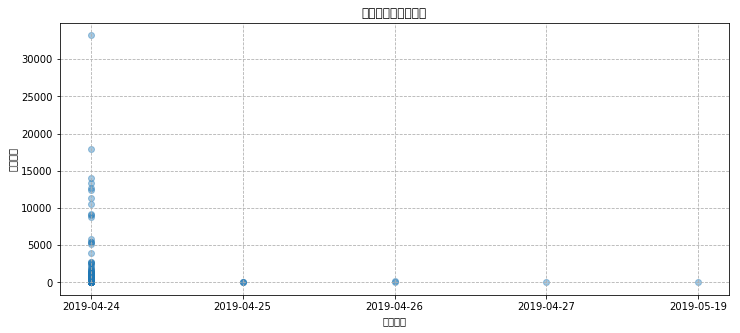

In [92]:
# 评论时间与有用数量的关系
plt.figure(figsize=(12,5))
plt.title('评论时间与有用数量')
plt.scatter(df['评论时间'],df['有用数量'],alpha=0.4)
plt.xlabel('评论时间')
plt.ylabel('有用数量')
plt.grid(linestyle='--')

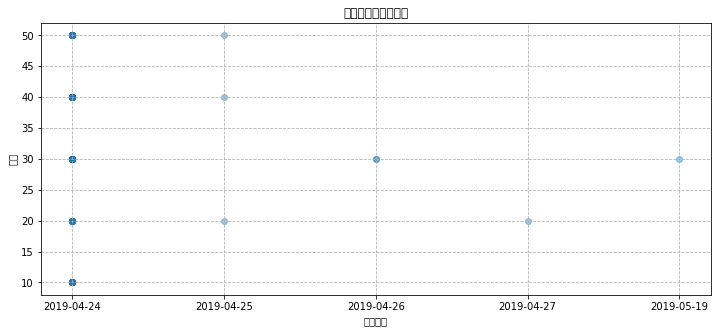

In [93]:
# 评论时间与评分关系
plt.figure(figsize=(12,5))
plt.title('评论时间与评分关系')
plt.scatter(df['评论时间'],df['评分'],alpha=0.4)
plt.xlabel('评论时间')
plt.ylabel('评分')
plt.grid(linestyle='--')

### 3、关键人物分析

In [94]:
df.head()

,有用数量,评分,评论内容,评论时间,评论者,评论字数
0,33204,50,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,2019-04-24,棠枫海,38
1,17958,40,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,2019-04-24,Tel,115
2,5822,40,对某人而言这就叫有始有终吧，这个时代的星战（90后终于有长达十年的情怀和回忆了）,2019-04-24,深夜的阿斯伯格,40
3,14081,50,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,2019-04-24,凌睿,335
4,12488,50,钢铁侠成为了美队，美队活成了钢铁侠。,2019-04-24,Rafe,18


In [97]:
keyword = '灭霸'
n = 0
for i in df['评论内容']:
    if keyword in i:
        n += 1
print(len(df))
print(n)

120
8


In [100]:
# 创建函数查找文字出现次数
def name_count(namei,s):
    n = 0
    for i in s:
        if namei in i :
            n += 1
    return n

name_count('美队', df['评论内容'])

11

In [120]:
namelst = ['美队','钢铁侠','灭霸','黑寡妇','雷神','浩克','惊奇队长',
            '鹰眼','蚁人','奇异博士','蜘蛛侠','星云','黑豹']

for i in namelst:
    print(i,name_count(i,df['评论内容']))

美队 11
钢铁侠 13
灭霸 8
黑寡妇 7
雷神 9
浩克 2
惊奇队长 4
鹰眼 4
蚁人 4
奇异博士 1
蜘蛛侠 0
星云 0
黑豹 0


In [124]:
# 计算不同关键字出现频率
lst = []
#print(namelst)

for namei in namelst:
    #print(namei)
    lst.append({'关键字':namei,'出现频率':name_count(namei,df['评论内容'])})
    
result = pd.DataFrame(lst)
result.to_csv('D:\python_note\DataPractice\复联_result.csv')
result

,关键字,出现频率
0,美队,11
1,钢铁侠,13
2,灭霸,8
3,黑寡妇,7
4,雷神,9
5,浩克,2
6,惊奇队长,4
7,鹰眼,4
8,蚁人,4
9,奇异博士,1


词云：https://wordart.com/create
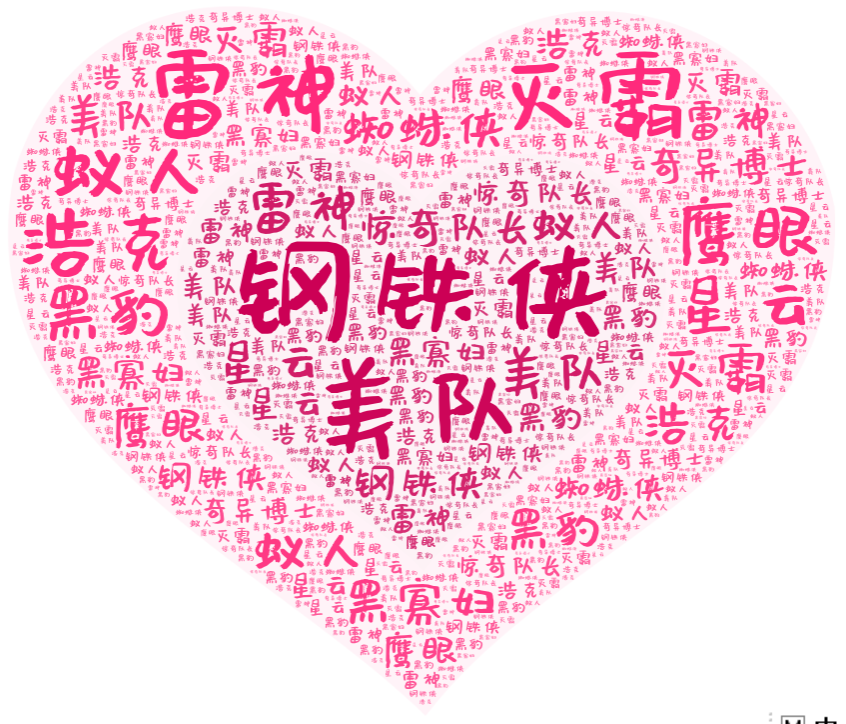